<a href="https://colab.research.google.com/github/wakayamahiro/owa/blob/main/%E5%B7%A8%E4%BA%BA%E3%81%8C%E7%8F%BE%E3%82%8C%E3%81%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##その日人類は思い出した。ヤツらに支配されていた恐怖を…

ここ東京に巨人が出現した画像を作る

東京の画像をダウンロード

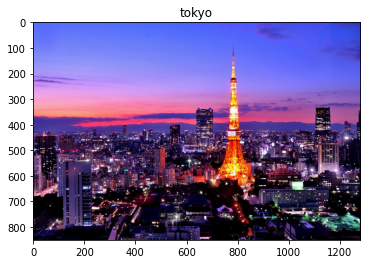

In [ ]:
# 以下にプログラムを記載する  
img_src = cv2.imread('./images/tokyo.jpg')
img_rgb = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('tokyo')
plt.show()

巨人の画像をダウンロードすると、左を向いている

東京の画像にのっける時に東京タワーの方を向いて欲しいので左右反転する



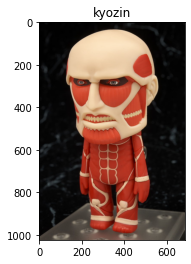

In [ ]:
img_src = cv2.imread('./images/kyozin.jpg')
img_rgb = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("kyozin")
plt.show()

In [ ]:
from PIL import Image, ImageOps
im = Image.open('./images/kyozin.jpg')
im_mirror = ImageOps.mirror(im)
im_mirror.save('./images/kyozin2.jpg', quality=95)

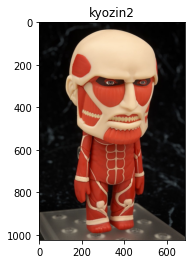

In [ ]:
img_src = cv2.imread('./images/kyozin2.jpg')
img_rgb = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("kyozin2")
plt.show()

###東京の画像にサイズを合わすために巨人の画像をリサイズをする。

巨人の元画像は700×1050くらいで簡単にして2×3なので東京の画像に合わすため400×600でリサイズ*

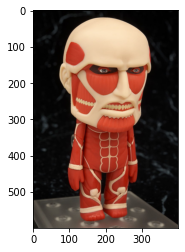

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

#画像の読み込み
beautiful_view = Image.open('./images/kyozin2.jpg')

#画像を表示して確認
plt.imshow(beautiful_view)

#画像のリサイズ
small_beautiful_view = beautiful_view.resize((400, 600))

#リサイズした画像を表示して確認
plt.imshow(small_beautiful_view)

#リサイズした画像を名前をつけて保存
small_beautiful_view.save('./images/kyozin3.jpg')

###背景を透過する

今回の画像は元々透過しやすいような画像なので、弱めに透過をかけると成功する



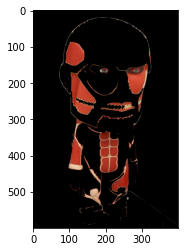

In [ ]:
import numpy as np

im = cv2.imread('./images/kyozin3.jpg')
h, w, c = im.shape
diff = (12, 12, 12)
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im, mask, (10, 10), (0, 0, 0), diff, diff)
im[:, :4] = 0
im[:, -4:] = 0
im[:4, :] = 0
im[-4:, :] = 0
#figure()
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
#axis('off')
#show()
#print im.shape

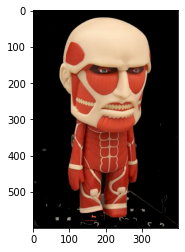

In [ ]:
im = cv2.imread('./images/kyozin3.jpg')
h, w, c = im.shape
diff = (6, 10, 12)
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im, mask, (10, 10), (0, 0, 0), diff, diff)
im[:, :4] = 0
im[:, -4:] = 0
im[:4, :] = 0
im[-4:, :] = 0
#figure()
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
#axis('off')
#show()

###東京の画像の上に巨人の画像をのっける

巨人の足の部分があまりうまく透過できていないので足が切れるくらいのところに配置する

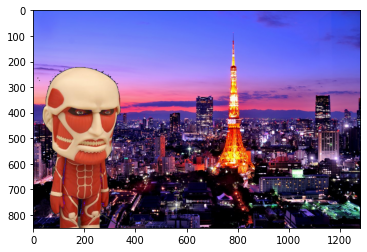

In [ ]:
im2 = cv2.imread('./images/tokyo.jpg')

M = np.array([[1.2, 0, -50], [0, 1.2, 200]]).astype(float)
im3 = cv2.warpAffine(im, M, im2.shape[1::-1])
alpha = 1.0*(im3<4)
im4 = im2*alpha + im3
#figure(figsize=(16, 16))
#plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(im4, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(im4.astype(np.uint8), cv2.COLOR_BGR2RGB))
#axis('off')
#show()

まってwwwwwww死ぬ。。。けど成功。

少し黒の部分がちょっと残ってるけど、

##参考文献

「実践コンピュータビジョン」の全演習問題をやってみた。詳細編　第10章　OpenCV
https://qiita.com/moizumi99/items/6eb3a69ef0ddf1e85f1b

#


Pythonで画像をリサイズする方法を現役エンジニアが解説【初心者向け】

https://techacademy.jp/magazine/33016